In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Load the data into a DataFrame for graphing
df = pd.read_csv('./Outputs/pop_sea_NasaTemp_full.csv')
# Ensure the dataframe has all required columns
required_columns = ['year', 'GMSL', 'avgtemp', 'pop']
for column in required_columns:
    if column not in df.columns:
        raise ValueError(f"Missing required column: {column}")
# Display the first few rows of the dataframe to verify
df.head()

,Unnamed: 0,year,GMSL,pop,popChangePercent,avgtemp
0,0,1880,-158.725,1.416810e+09,0.000,13.72
1,1,1881,-153.058,1.426106e+09,0.656,13.81
2,2,1882,-169.883,1.435993e+09,0.693,13.79
3,3,1883,-164.592,1.446463e+09,0.729,13.72
4,4,1884,-143.750,1.457063e+09,0.733,13.62


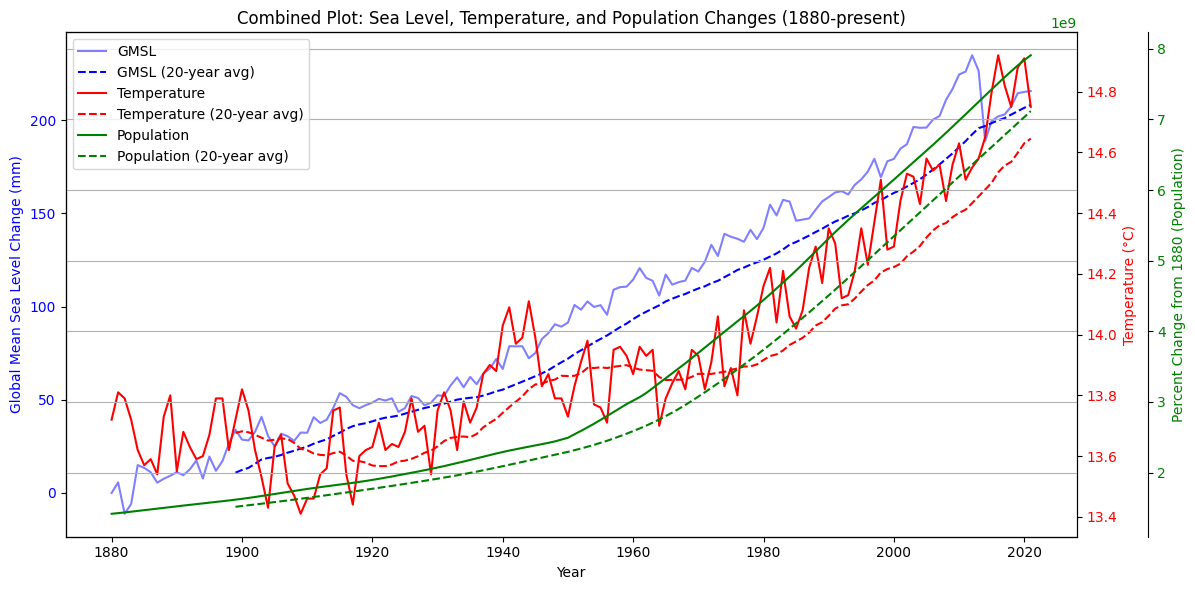

In [8]:
# Create Combined Plot with Three Y-axes

# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate rolling averages (20-year window)
window = 20
gmsl_avg = df['GMSL'].rolling(window=window).mean()
temp_avg = df['avgtemp'].rolling(window=window).mean()
pop_avg = df['pop'].rolling(window=window).mean()

# Plot GMSL data on the primary y-axis
shift_value = df[df['year'] == 1880]['GMSL'].values[0]
ax1.plot(df['year'], df['GMSL'] - shift_value, color='blue', label='GMSL', alpha=0.5)
ax1.plot(df['year'], gmsl_avg - shift_value, color='blue', label='GMSL (20-year avg)', linestyle='--')
ax1.set_xlabel('Year')
ax1.set_ylabel('Global Mean Sea Level Change (mm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for temperature
ax2 = ax1.twinx()
ax2.plot(df['year'], df['avgtemp'], color='red', label='Temperature')
ax2.plot(df['year'], temp_avg, color='red', label='Temperature (20-year avg)', linestyle='--')
ax2.set_ylabel('Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Create third y-axis for population
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.07))  
ax3.plot(df['year'], df['pop'], color='green', label='Population')
ax3.plot(df['year'], pop_avg, color='green', label='Population (20-year avg)', linestyle='--')
ax3.set_ylabel('Percent Change from 1880 (Population)', color='green')
ax3.tick_params(axis='y', labelcolor='green')

# Add title and legend
plt.title('Combined Plot: Sea Level, Temperature, and Population Changes (1880-present)')
fig.tight_layout()

# Combine legends from all axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')

# Show plot
plt.grid(True)
plt.show()